- number of cores, set this number according to your computer

In [1]:
from helper import *
from stats import *
from product_info import *
from imp import reload  
import helper
import stats
#import product_info
reload(helper)
reload(stats)
#reload(product_info)

<module 'stats' from 'C:\\Users\\dell\\stats.py'>

In [2]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM
## 16

16

- sample product, you can change to your specific product symbol

In [3]:
product_list = ["bu", "ru", "v", "pp", "l", "jd"]

In [4]:
import dask
#from dask import compute, delayed
from dask import delayed

- get the list of this form

In [5]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product_list[0])))
n_days = len(all_dates)
n_days
## 1088

1066

- number of days

In [6]:
all_dates[:6]

#['20160601.pkl',
# '20160602.pkl',
# '20160603.pkl',
# '20160606.pkl',
# '20160607.pkl',
# '20160608.pkl']

['20171009.pkl',
 '20171010.pkl',
 '20171011.pkl',
 '20171012.pkl',
 '20171013.pkl',
 '20171016.pkl']

- some days may have error because of rolling contracts

- we randomly choose a day

In [7]:
data = load(DATA_PATH+product_list[0]+"/"+"20190828.pkl")

In [8]:
np.where(data["good"])

## (array([14133, 14134, 14135, ..., 52118, 52119, 52120], dtype=int64),)

(array([14133, 14134, 14135, ..., 52118, 52119, 52120], dtype=int64),)

In [9]:
data[data["good"]]

,contract,date.time,price,cum.open.int,open.int,turnover,qty,bid,ask,bid.qty,...,wpr,wpr.ret,next.ask,next.bid,min.1024,max.1024,min.2048,max.2048,min.4096,max.4096
14133,bu1912,2019-08-28 09:00:00.500,3158.0,688412,328,352440920.0,11202,3158.0,3162.0,32,...,3158.621359,33.111682,3164.0,3162.0,3123.288038,3158.621359,3123.288038,3158.621359,3118.905738,3158.621359
14134,bu1912,2019-08-28 09:00:01.000,3164.0,686918,-1494,117210480.0,3710,3162.0,3164.0,34,...,3162.894737,4.273378,3162.0,3160.0,3123.288038,3162.894737,3123.288038,3162.894737,3120.132075,3162.894737
14135,bu1912,2019-08-28 09:00:01.500,3160.0,687084,166,110934600.0,3510,3160.0,3162.0,32,...,3161.828571,-1.066165,3156.0,3152.0,3123.288038,3162.894737,3123.288038,3162.894737,3120.187643,3162.894737
14136,bu1912,2019-08-28 09:00:02.000,3154.0,686494,-590,51240320.0,1624,3152.0,3156.0,44,...,3155.200000,-6.628571,3154.0,3152.0,3123.288038,3162.894737,3123.288038,3162.894737,3120.191781,3162.894737
14137,bu1912,2019-08-28 09:00:02.500,3154.0,686980,486,114810520.0,3642,3152.0,3154.0,74,...,3153.761905,-1.438095,3152.0,3150.0,3123.288038,3162.894737,3123.288038,3162.894737,3120.247788,3162.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52116,bu1912,2019-08-28 22:59:58.500,3130.0,681338,-2,375600.0,12,3128.0,3130.0,29,...,3128.610526,0.024668,3130.0,3128.0,3118.996743,3133.298611,3111.692308,3136.819127,3111.692308,3151.405405
52117,bu1912,2019-08-28 22:59:59.000,3130.0,681330,-8,438200.0,14,3128.0,3130.0,30,...,3128.674157,0.063631,3130.0,3128.0,3118.996743,3133.298611,3111.692308,3136.819127,3111.692308,3151.405405
52118,bu1912,2019-08-28 22:59:59.500,3128.0,681340,10,876040.0,28,3128.0,3130.0,19,...,3128.520548,-0.153609,3130.0,3128.0,3118.996743,3133.298611,3111.692308,3136.819127,3111.692308,3151.405405
52119,bu1912,2019-08-28 23:00:00.000,3128.0,681330,-10,563120.0,18,3128.0,3130.0,12,...,3128.328767,-0.191781,3130.0,3128.0,3118.996743,3133.298611,3111.692308,3136.819127,3111.692308,3151.405405


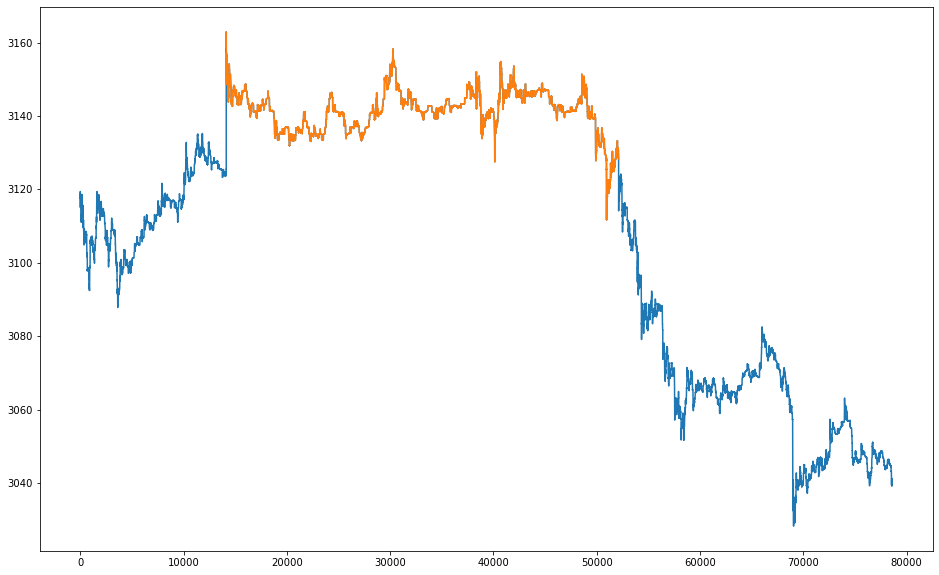

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(16, 10))
plt.plot(data.reset_index()["wpr"]);
plt.plot(data.reset_index()[data.reset_index()["good"]]["wpr"]);

In [11]:
data = load(DATA_PATH+product_list[0]+"/"+all_dates[0])

- plot all the data

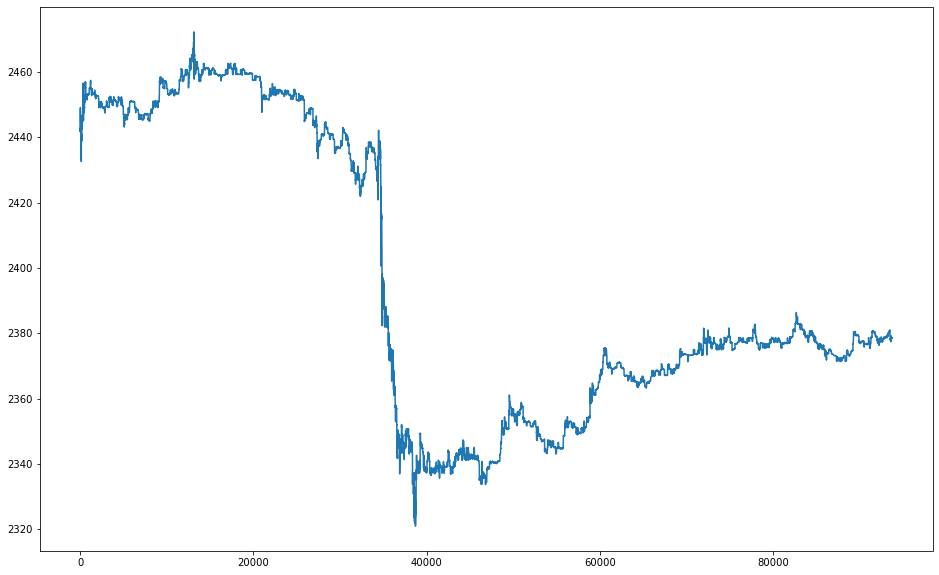

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(16, 10))
plt.plot(data["wpr"].values);

- Welcome to Quantitative and High Frequency Trading Training Program


- plot the data to be used in red

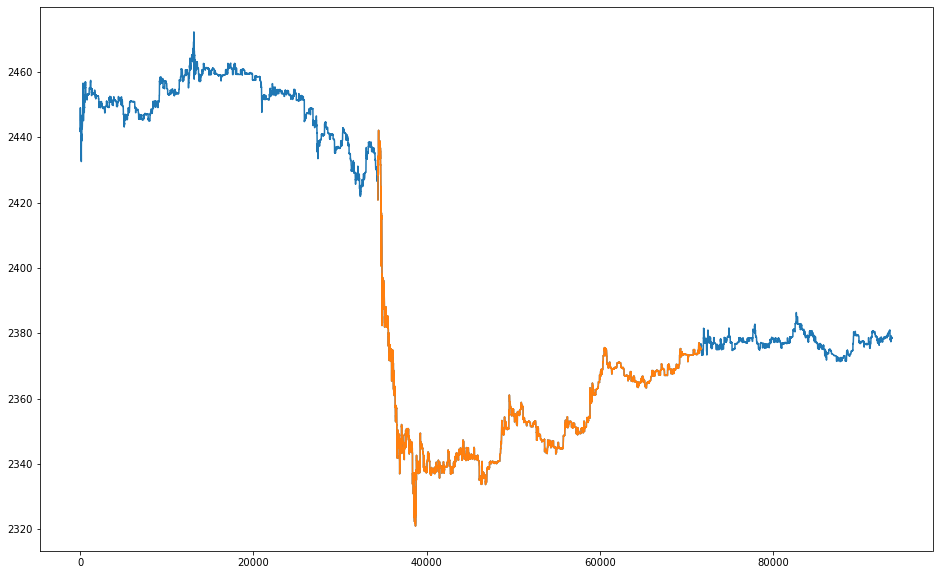

In [14]:
plt.figure(1, figsize=(16, 10))
plt.plot(data.reset_index()["wpr"]);
plt.plot(data.reset_index()[data.reset_index()["good"]]["wpr"]);

- number of usable points

In [15]:
sum(data["good"])
## 37305

37305

- total number of two days

In [16]:
len(data)
## 93753

93753

- so we only use the middle part of the data


- test the first predictive signal
- we can use look-back period of 4096 at first

In [17]:
period = 4096

- the first signal is the buy/sell imbalance signal


- create directory for all signals

- create directory for the product

In [18]:
import os
for product in product_list:
    os.makedirs(HEAD_PATH + "/tmp pkl/" + product, exist_ok=True)

- create directory for the signal

In [19]:
for product in product_list:
    os.makedirs(HEAD_PATH + "/tmp pkl/" + product + "/trade.imb." + str(period), exist_ok=True)

- now let's check the signal


- it's the buy/sell imbalance of one tick

- zero_divide is zero when denominator is zero
- we can see the definition of zero_divide in helper.py


- returns 0 if the numerator or denominator is 0

In [20]:
def zero_divide(x, y):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        res = np.divide(x,y)
    if hasattr(y, "__len__"):
        res[y == 0] = 0
    elif y == 0:
        if hasattr(x, "__len__"):
            res = np.zeros(len(x))
        else:
            res = 0
    return res

In [21]:
class foctor_total_trade_imb_period(factor_template):
    factor_name = "total.trade.imb.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(12,13)))
    ])
    
    def formula(self, data, period):
        return vanish_thre(zero_divide(ewma(data["buy.trade"]+data["buy2.trade"]-data["sell.trade"]-data["sell2.trade"], period, adjust=True), 
                           ewma(data["qty"], period, adjust=True)),1).values

In [23]:
SAVE_PATH = "e:/intern"
x1 = foctor_total_trade_imb_period()
for product in product_list:
    create_signal_path(x1, product, SAVE_PATH);

e:/intern/tmp pkl/bu/total.trade.imb.1024
e:/intern/tmp pkl/bu/total.trade.imb.2048
e:/intern/tmp pkl/bu/total.trade.imb.4096
e:/intern/tmp pkl/ru/total.trade.imb.1024
e:/intern/tmp pkl/ru/total.trade.imb.2048
e:/intern/tmp pkl/ru/total.trade.imb.4096
e:/intern/tmp pkl/v/total.trade.imb.1024
e:/intern/tmp pkl/v/total.trade.imb.2048
e:/intern/tmp pkl/v/total.trade.imb.4096
e:/intern/tmp pkl/pp/total.trade.imb.1024
e:/intern/tmp pkl/pp/total.trade.imb.2048
e:/intern/tmp pkl/pp/total.trade.imb.4096
e:/intern/tmp pkl/l/total.trade.imb.1024
e:/intern/tmp pkl/l/total.trade.imb.2048
e:/intern/tmp pkl/l/total.trade.imb.4096
e:/intern/tmp pkl/jd/total.trade.imb.1024
e:/intern/tmp pkl/jd/total.trade.imb.2048
e:/intern/tmp pkl/jd/total.trade.imb.4096


In [24]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x1, product=product, HEAD_PATH=SAVE_PATH)
;
# Wall time: 15min 15s

Wall time: 15min 15s


''

- we can check the result

- we can see that they are the same
- so the signal calculation process is correct


- now calcualte all the value of this signal

In [25]:
import statsmodels.tsa.stattools as ts
import math

In [26]:
import warnings
 
warnings.filterwarnings('ignore')

In [28]:
to_choose = np.where(np.mod(range(n_days),10)==0)
signal_name = "total.trade.imb.4096"
for product in product_list:
    all_signal = np.array([])
    for file in np.array(all_dates)[to_choose]:
        data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
        S = S[data["good"]]
        all_signal = np.concatenate((all_signal, S), axis=0)
    sample_signal = all_signal[np.arange(1,len(all_signal)+1)% period==0]
    result = ts.adfuller(sample_signal, maxlag=int(pow(len(sample_signal)-1,(1/3))), regression='ct', autolag=None)
    print(product, "adf", result)
    result = ts.kpss(sample_signal, regression='c', nlags=int(3*math.sqrt(len(sample_signal))/13))
    print(product, "kpss", result)
    
# bu adf (-7.987514964738437, 7.636086465902793e-11, 9, 931, {'1%': -3.9685270243674373, '5%': -3.4152162707215044, '10%': -3.1298317848734176})
# bu kpss (0.22683987461778515, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# ru adf (-8.20539694358214, 2.3951304850934805e-11, 9, 933, {'1%': -3.968506038122082, '5%': -3.415206116840498, '10%': -3.129825811971361})
# ru kpss (0.2300084373883401, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# v adf (-6.564419826396674, 1.3312213695203344e-07, 8, 566, {'1%': -3.9748543549768636, '5%': -3.418275346820655, '10%': -3.1316305733016896})
# v kpss (0.2210090269926741, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# pp adf (-7.242492639830508, 3.969369597858064e-09, 9, 803, {'1%': -3.9700884437054196, '5%': -3.4159715979702576, '10%': -3.1302760555769007})
# pp kpss (0.11877666525823463, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# l adf (-7.63762683955089, 4.911315681271973e-10, 8, 630, {'1%': -3.9732121616136165, '5%': -3.417481836790683, '10%': -3.131164105628142})
# l kpss (0.1662005653149266, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# jd adf (-7.322721732931546, 2.6014187490442593e-09, 7, 477, {'1%': -3.9778754236927134, '5%': -3.4197343245638563, '10%': -3.132488001829389})
# jd kpss (0.23193084379318735, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

bu adf (-7.987514964738437, 7.636086465902793e-11, 9, 931, {'1%': -3.9685270243674373, '5%': -3.4152162707215044, '10%': -3.1298317848734176})
bu kpss (0.22683987461778515, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
ru adf (-8.20539694358214, 2.3951304850934805e-11, 9, 933, {'1%': -3.968506038122082, '5%': -3.415206116840498, '10%': -3.129825811971361})
ru kpss (0.2300084373883401, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
v adf (-6.564419826396674, 1.3312213695203344e-07, 8, 566, {'1%': -3.9748543549768636, '5%': -3.418275346820655, '10%': -3.1316305733016896})
v kpss (0.2210090269926741, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
pp adf (-7.242492639830508, 3.969369597858064e-09, 9, 803, {'1%': -3.9700884437054196, '5%': -3.4159715979702576, '10%': -3.1302760555769007})
pp kpss (0.11877666525823463, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
l adf (-7.63762683955089, 4.911315681271973e-10, 8, 630

- for adf, if p-valus(the second one) is small, then it's stationary;
- for kpss, if p-value is large, then it's stationary;
- so for trade.imb.4096, all of them are stationary
- now we calcualte another signal which measures the range ranther than direciton

In [29]:
class foctor_trade_imb_period(factor_template):
    factor_name = "trade.imb.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(12,13)))
    ])
    
    def formula(self, data, period):
        return ewma(zero_divide(data["buy.trade"] - data["sell.trade"], data["buy.trade"] + data["sell.trade"]), period, adjust=True).values

In [30]:
x4 = foctor_trade_imb_period()
for product in product_list:
    create_signal_path(x4, product, SAVE_PATH);

e:/intern/tmp pkl/bu/trade.imb.4096
e:/intern/tmp pkl/ru/trade.imb.4096
e:/intern/tmp pkl/v/trade.imb.4096
e:/intern/tmp pkl/pp/trade.imb.4096
e:/intern/tmp pkl/l/trade.imb.4096
e:/intern/tmp pkl/jd/trade.imb.4096


In [31]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x4, product=product, HEAD_PATH=SAVE_PATH)
# Wall time: 17min 22s

Wall time: 17min 22s


In [32]:
period = 4096
to_choose = np.where(np.mod(range(n_days),10)==0)
signal_name = "trade.imb.4096"
for product in product_list:
    all_signal = np.array([])
    for file in np.array(all_dates)[to_choose]:
        data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
        S = S[data["good"]]
        all_signal = np.concatenate((all_signal, S), axis=0)
    sample_signal = all_signal[np.arange(1,len(all_signal)+1)% period==0]
    result = ts.adfuller(sample_signal, maxlag=int(pow(len(sample_signal)-1,(1/3))), regression='ct', autolag=None)
    print(product, "adf", result)
    result = ts.kpss(sample_signal, regression='c', nlags=int(3*math.sqrt(len(sample_signal))/13))
    print(product, "kpss", result)

# bu adf (-7.397089458460863, 1.7567617061467094e-09, 9, 931, {'1%': -3.9685270243674373, '5%': -3.4152162707215044, '10%': -3.1298317848734176})
# bu kpss (0.12458172246600008, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# ru adf (-9.446537752200278, 3.644123922224563e-14, 9, 933, {'1%': -3.968506038122082, '5%': -3.415206116840498, '10%': -3.129825811971361})
# ru kpss (0.9634241440245647, 0.01, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# v adf (-7.013094901252269, 1.3197972741779442e-08, 8, 566, {'1%': -3.9748543549768636, '5%': -3.418275346820655, '10%': -3.1316305733016896})
# v kpss (0.11200151666475637, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# pp adf (-8.707061668771335, 1.6820210265375512e-12, 9, 803, {'1%': -3.9700884437054196, '5%': -3.4159715979702576, '10%': -3.1302760555769007})
# pp kpss (0.3178742016592536, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# l adf (-8.539729971694, 4.066035456690192e-12, 8, 630, {'1%': -3.9732121616136165, '5%': -3.417481836790683, '10%': -3.131164105628142})
# l kpss (0.4524905496833562, 0.054529935481311985, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# jd adf (-7.644286044260731, 4.740659384759644e-10, 7, 477, {'1%': -3.9778754236927134, '5%': -3.4197343245638563, '10%': -3.132488001829389})
# jd kpss (0.04775823217873935, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


bu adf (-7.397089458460863, 1.7567617061467094e-09, 9, 931, {'1%': -3.9685270243674373, '5%': -3.4152162707215044, '10%': -3.1298317848734176})
bu kpss (0.12458172246600008, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
ru adf (-9.446537752200278, 3.644123922224563e-14, 9, 933, {'1%': -3.968506038122082, '5%': -3.415206116840498, '10%': -3.129825811971361})
ru kpss (0.9634241440245647, 0.01, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
v adf (-7.013094901252269, 1.3197972741779442e-08, 8, 566, {'1%': -3.9748543549768636, '5%': -3.418275346820655, '10%': -3.1316305733016896})
v kpss (0.11200151666475637, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
pp adf (-8.707061668771335, 1.6820210265375512e-12, 9, 803, {'1%': -3.9700884437054196, '5%': -3.4159715979702576, '10%': -3.1302760555769007})
pp kpss (0.3178742016592536, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
l adf (-8.539729971694, 4.066035456690192e-12, 8, 63

In [33]:
def get_atr(file, product, period_list, HEAD_PATH):
    data = load(file)
    for period in period_list:
        S = (data["max."+str(period)]-data["min."+str(period)])/data["wpr"]
        save(S, HEAD_PATH+"/tmp pkl/"+product+"/atr."+str(period)+"/" + file[-12:])


In [34]:
for product in product_list:
    for period in [4096]:
        os.makedirs(SAVE_PATH + "/tmp pkl/" + product+"/atr."+str(period), exist_ok=True)

In [35]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, get_atr, product=product,period_list=np.power(2, range(12,13)), HEAD_PATH=SAVE_PATH) 

# Wall time: 15min 25s

Wall time: 15min 25s


- It measures how many bid/ask spreads of range in the previous period 
- In this case, we can measure volatility of each product in similar criteron
- because slippage is the largest cost for intraday trading

- Then we can modify our backtest program to include a trend signal and a range signal

In [41]:
from collections import OrderedDict
def get_signal_pnl(file, product, signal_name, thre_mat, reverse=1, tranct=1.1e-4, max_spread=0.61, tranct_ratio=True, 
                   HEAD_PATH="d:/intern", SAVE_PATH="e:/intern", atr_filter=0):
    ## load data
    data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
    S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
    pred = S*reverse
    pred = pred[data["good"]]
    atr = load(SAVE_PATH+"/tmp pkl/"+product+"/"+"atr.4096"+"/"+file)
    atr = atr[data["good"]].reset_index(drop=True)
    data = data[data["good"]].reset_index(drop=True)
    #n_bar = len(data)
    
    ## load signal
    
    ## we don't know the signal is positive correlated or negative correlated  
    #n_thre = len(thre_mat)
    result = pd.DataFrame(data=OrderedDict([("open", thre_mat["open"].values), ("close", thre_mat["close"].values),
                               ("num", 0), ("avg.pnl", 0), ("pnl", 0), ("avg.ret", 0), ("ret", 0)]), 
                          index=thre_mat.index)
    count = 0;
    cur_spread = data["ask"]-data["bid"]
    for thre in thre_mat.iterrows():
        count = count+1
        buy = pred>thre[1]["open"]
        sell = pred<-thre[1]["open"]
        signal = pd.Series(data=0, index=data.index)
        position = signal.copy()
        signal[buy] = 1
        signal[sell] = -1
        signal[atr<atr_filter]=0
        scratch = -thre[1]["close"]
        position_pos = pd.Series(data=np.nan, index=data.index)
        position_pos.iloc[0] = 0
        position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0) & (cur_spread<max_spread)] = 1
        position_pos[(pred< -scratch) & (data["next.bid"]>0) & (cur_spread<max_spread)] = 0
        position_pos.ffill(inplace=True)
        pre_pos = position_pos.shift(1)
        notional_position_pos = pd.Series(data=0, index=data.index)
        notional_position_pos[position_pos==1] = 1
        notional_position_pos[(position_pos==1) & (pre_pos==1)] = np.nan
        notional_position_pos[(notional_position_pos==1)] = 1/data["next.ask"][(notional_position_pos==1)]
        notional_position_pos.ffill(inplace=True)
        position_neg = pd.Series(data=np.nan, index=data.index)
        position_neg.iloc[0] = 0
        position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0) & (cur_spread<max_spread)] = -1
        position_neg[(pred> scratch) & (data["next.ask"]>0) & (cur_spread<max_spread)] = 0
        position_neg.ffill(inplace=True)
        pre_neg = position_neg.shift(1)
        notional_position_neg = pd.Series(data=0, index=data.index)
        notional_position_neg[position_neg==-1] = -1
        notional_position_neg[(position_neg==-1) & (pre_neg==-1)] = np.nan
        notional_position_neg[(notional_position_neg==-1)] = -1/data["next.bid"][(notional_position_neg==-1)]
        notional_position_neg.ffill(inplace=True)
        position = position_pos + position_neg
        notional_position = notional_position_pos+notional_position_neg
        #position[n_bar-1] = 0
        position.iloc[0] = 0
        position.iloc[-2:] = 0
        notional_position.iloc[0] = 0
        notional_position.iloc[-2:] = 0
        change_pos = position - position.shift(1)
        notional_change_pos = notional_position-notional_position.shift(1)
        change_pos.iloc[0] = 0
        notional_change_pos.iloc[0] = 0
        change_base = pd.Series(data=0, index=data.index)
        change_buy = change_pos>0
        change_sell = change_pos<0
        if (tranct_ratio):
            change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
            change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
        else:
            change_base[change_buy] = data["next.ask"][change_buy]+tranct
            change_base[change_sell] = data["next.bid"][change_sell]-tranct
        final_pnl = -sum(change_base*change_pos)
        ret = -sum(change_base*notional_change_pos)
        num = sum((position!=0) & (change_pos!=0))
        if num == 0:
            result.loc[thre[0], ("num", "avg.pnl", "pnl", "avg.ret", "ret")] = (0,0,0,0,0)
            return result
        else:
            avg_pnl = np.divide(final_pnl, num)
            avg_ret = np.divide(ret,num)
            result.loc[thre[0], ("num", "avg.pnl", "pnl", "avg.ret", "ret")] = (num, avg_pnl, final_pnl, avg_ret,ret)
    return result

- First we want to know the range of signal

In [37]:
to_choose = (np.arange(n_days)+1) % 10 == 0
## chooose one day out of 10 days
signal_name = "total.trade.imb.4096"
all_product_signal = dict([])
for product in product_list:
    all_signal = np.array([])
    for file in np.array(all_dates)[to_choose]:
        data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
        S = S[data["good"]]
        all_signal = np.concatenate((all_signal, S), axis=0)
    all_product_signal[product] = all_signal

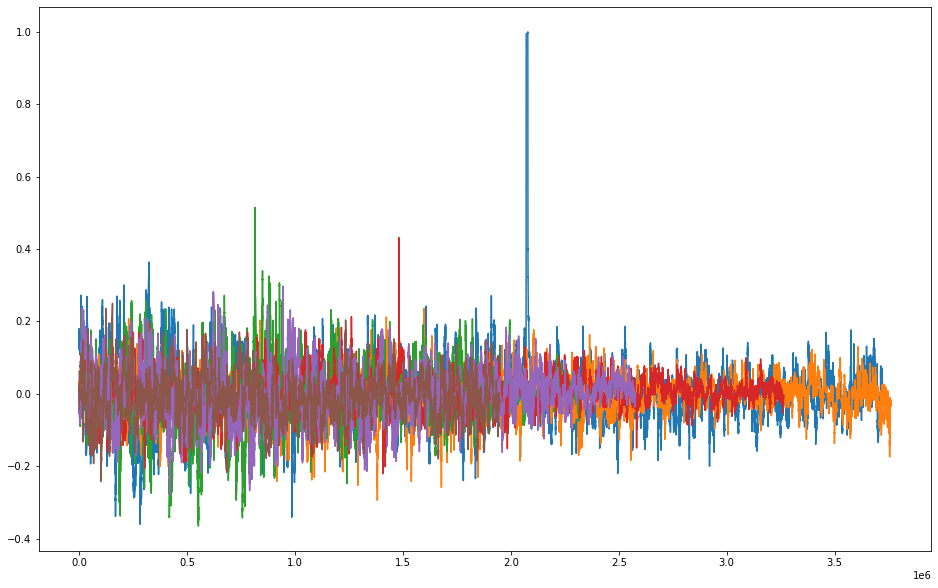

In [38]:
for product in product_list:
    plt.figure(1, figsize=(16, 10))
    plt.plot(all_product_signal[product]);

- we can plot the range together in one graph

In [39]:
to_choose = (np.arange(n_days)+1) % 10 == 0
## chooose one day out of 10 days
signal_name = "trade.imb.4096"
all_product_signal = dict([])
for product in product_list:
    all_signal = np.array([])
    for file in np.array(all_dates)[to_choose]:
        data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
        S = S[data["good"]]
        all_signal = np.concatenate((all_signal, S), axis=0)
    all_product_signal[product] = all_signal

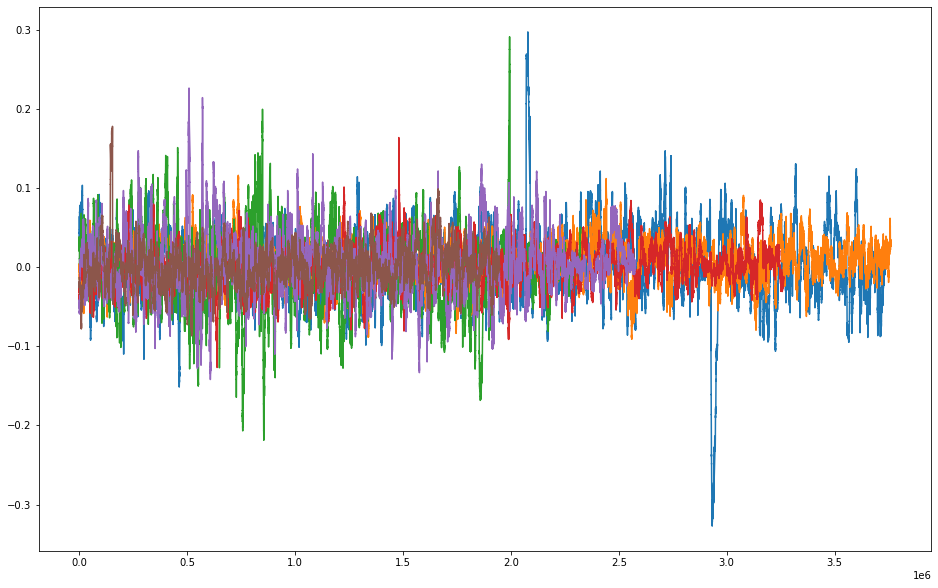

In [40]:
for product in product_list:
    plt.figure(1, figsize=(16, 10))
    plt.plot(all_product_signal[product]);

- then at the quantile values

In [42]:
from collections import OrderedDict
def get_hft_summary(result, thre_mat, n):
    all_result = pd.DataFrame(data={"daily.result": result})
    daily_num = all_result['daily.result'].apply(lambda x: x["num"])
    daily_pnl = all_result['daily.result'].apply(lambda x: x["pnl"])
    daily_ret = all_result['daily.result'].apply(lambda x: x["ret"])
    total_num = daily_num.sum()
    if len(total_num) != len(thre_mat):
        raise selfException("Mismatch!")
    total_pnl = daily_pnl.sum()
    total_ret = daily_ret.sum()
    avg_pnl = zero_divide(total_pnl, total_num)
    avg_ret = zero_divide(total_ret, total_num)
    total_sharp = sharpe(daily_pnl)
    total_drawdown = drawdown(daily_pnl)
    total_max_drawdown = max_drawdown(daily_pnl)
    sharpe_ret = sharpe(daily_ret)
    drawdown_ret = drawdown(daily_ret)
    max_drawdown_ret = max_drawdown(daily_ret)
    final_result = pd.DataFrame(data=OrderedDict([("open", thre_mat["open"]), ("close", thre_mat["close"]), ("num", total_num),
                                                 ("avg.pnl", avg_pnl), ("total.pnl", total_pnl), ("sharpe", total_sharp), 
                                                 ("drawdown", total_drawdown), ("max.drawdown", total_max_drawdown), 
                                                  ("avg.ret", avg_ret), ("total.ret",total_ret), ("sharpe.ret", sharpe_ret),
                                                  ("drawdown.ret", drawdown_ret), ("max.drawdown.ret", max_drawdown_ret),
                                                 ("mar", total_pnl/total_max_drawdown), ("mar.ret", total_ret/max_drawdown_ret)]), 
                                index=thre_mat.index)
    return OrderedDict([("final.result", final_result), ("daily.num", daily_num), ("daily.pnl", daily_pnl), ("daily.ret", daily_ret)])


In [43]:
%%time
signal_name = "total.trade.imb.4096"
all_trade_stat = dict([])
from collections import OrderedDict
import itertools
open_list = np.arange(0.1, 0.4, 0.02)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
for product in product_list:
    print(product)
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=0.01)
        result = compute([delayed(f_par)(file) for file in all_dates])[0]
    trade_stat = get_hft_summary(result, thre_mat, n_days)
    all_trade_stat[product] = trade_stat

# bu
# ru
# v
# pp
# l
# jd
# Wall time: 16min 59s


bu
ru
v
pp
l
jd
Wall time: 16min 59s


In [44]:
save(all_trade_stat, HEAD_PATH+"/"+"energy_trade_stat_total_trade_imb_4096.pkl")

In [53]:
%%time
signal_name = "trade.imb.4096"
all_trade_stat = dict([])
from collections import OrderedDict
import itertools
open_list = np.arange(0.06, 0.2, 0.02)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
for product in product_list:
    print(product)
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=0.01)
        result = compute([delayed(f_par)(file) for file in all_dates])[0]
    trade_stat = get_hft_summary(result, thre_mat, n_days)
    all_trade_stat[product] = trade_stat

# bu
# ru
# v
# pp
# l
# jd
# Wall time: 14min 47s

bu
ru
v
pp
l
jd
Wall time: 14min 47s


In [55]:
save(all_trade_stat, HEAD_PATH+"/"+"energy_trade_stat_trade_imb_4096.pkl")

- it seems the signal value leans to negative

- for example we care about the average pnl

In [56]:
date_str = [n[0:8] for n in all_dates]
format_dates = np.array([pd.to_datetime(d) for d in date_str])

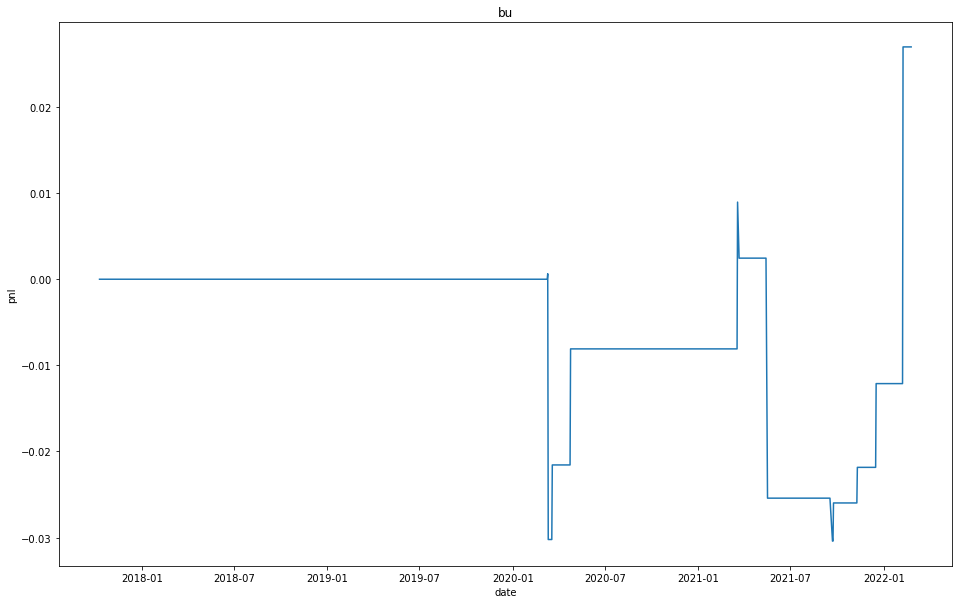

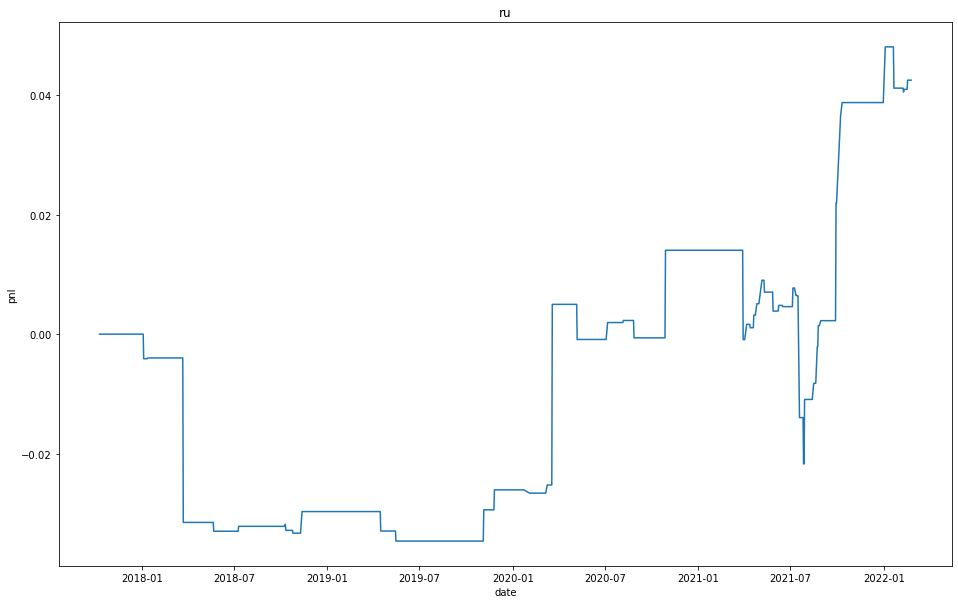

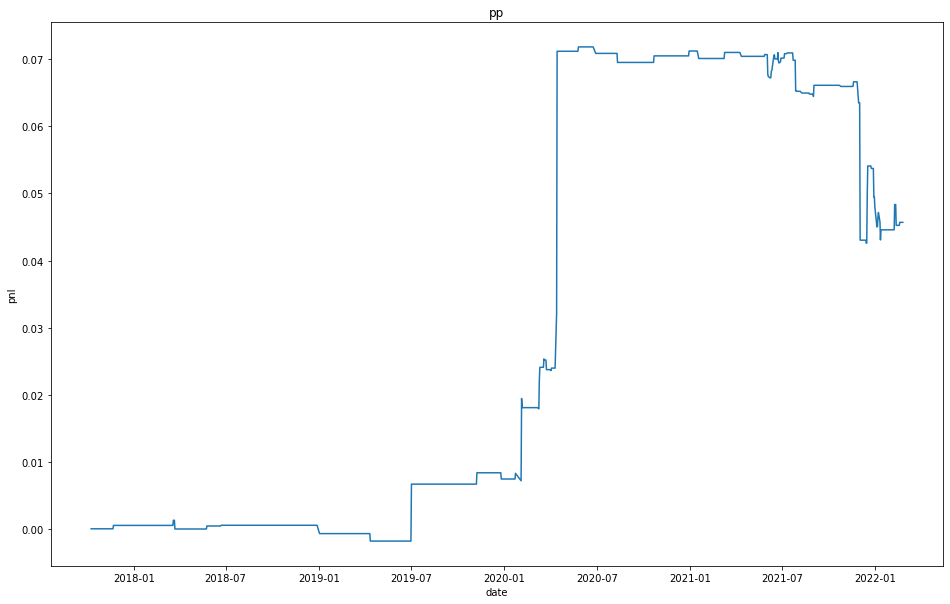

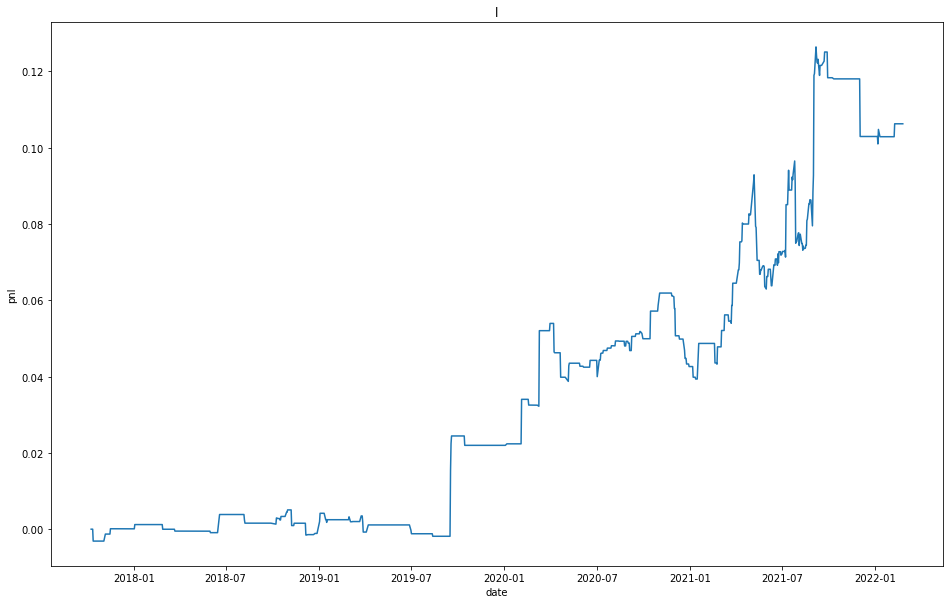

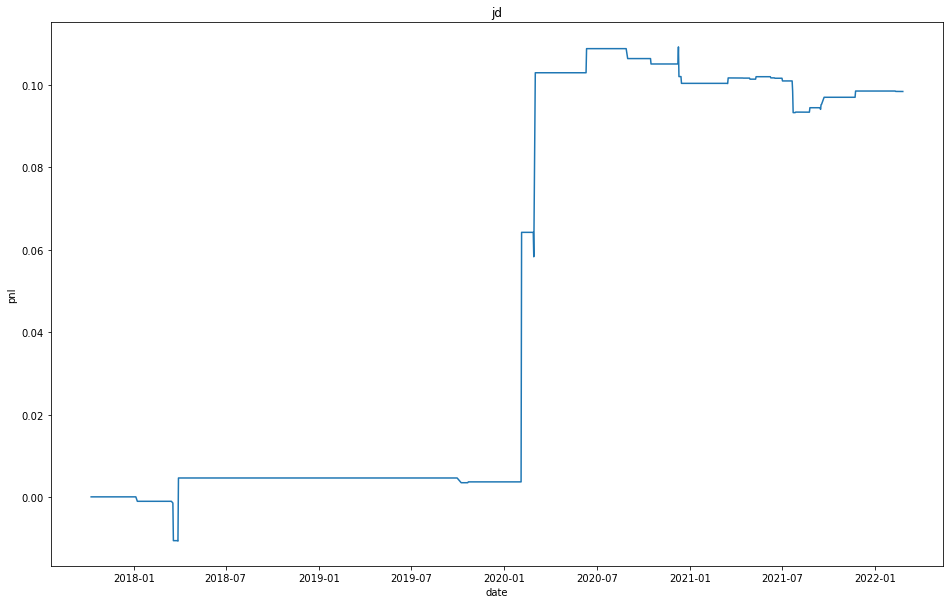

In [58]:
all_trade_stat = load(HEAD_PATH+"/"+"energy_trade_stat_trade_imb_4096.pkl")
all_pnl = np.zeros([n_days, len(product_list)])
i = 0
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = all_trade_stat[product]
    good_strat = trade_stat["final.result"]["avg.pnl"]>1*spread
    if sum(good_strat)==0:
        continue;
    good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    all_pnl[:,i] = good_pnl
    i = i+1
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates, good_pnl.cumsum());

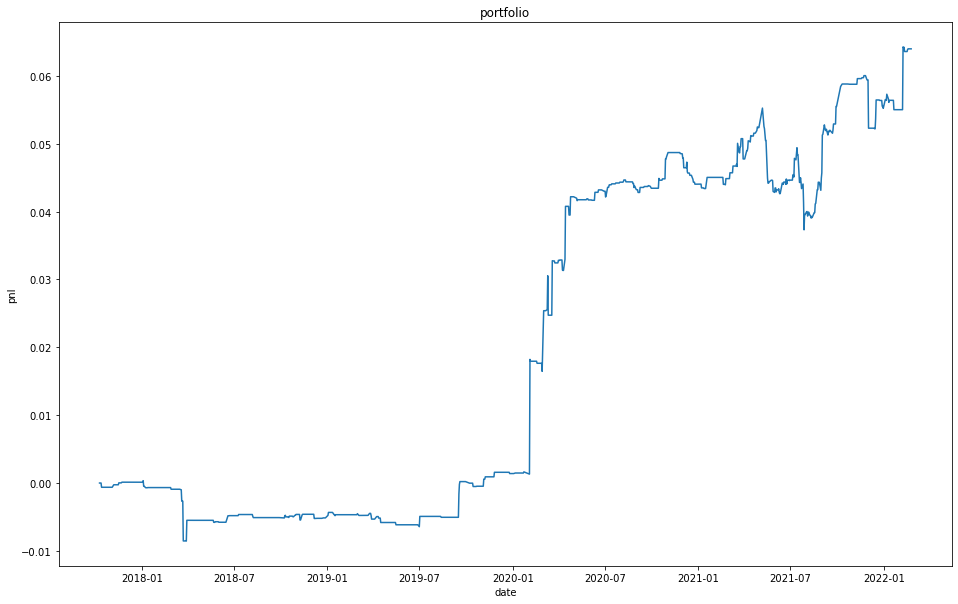

In [59]:
all_portfolio = np.array(np.mean(all_pnl[:,:i], axis=1))
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());

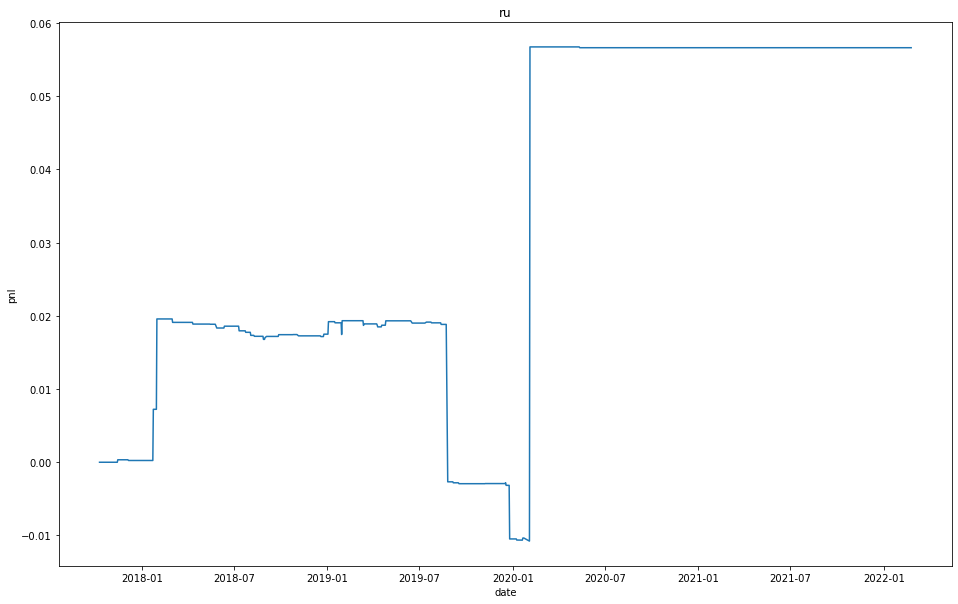

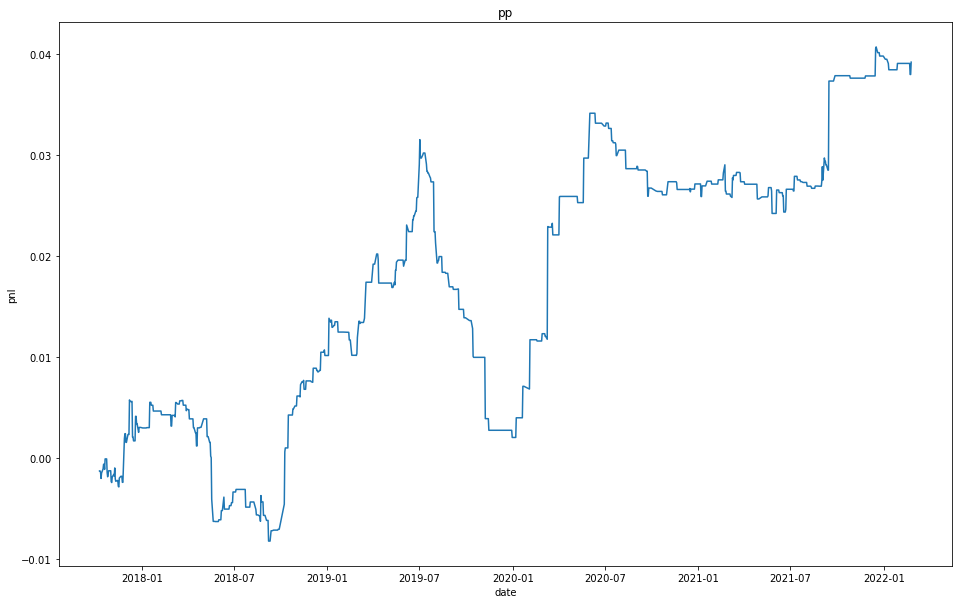

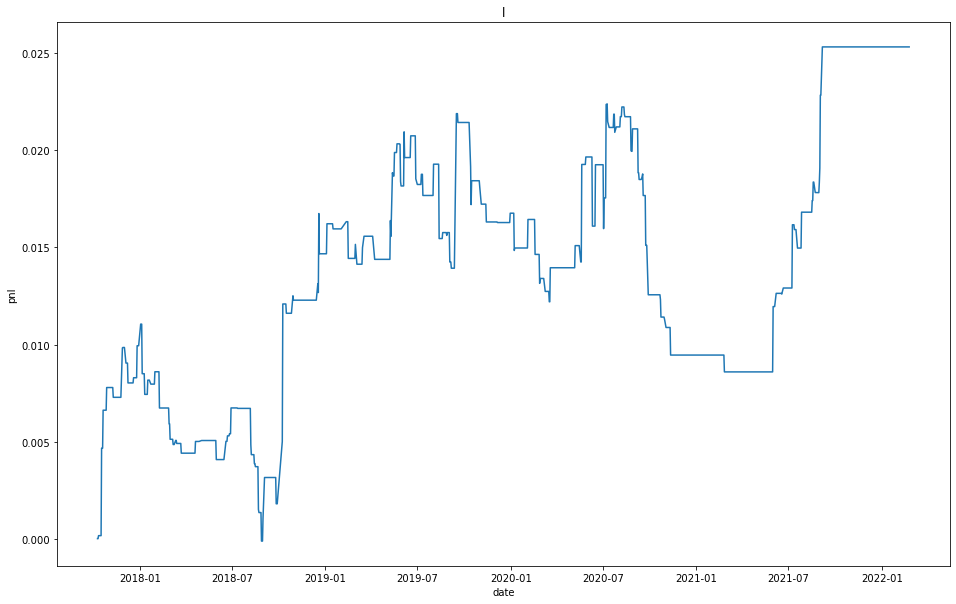

In [60]:
all_trade_stat = load(HEAD_PATH+"/"+"energy_trade_stat_total_trade_imb_4096.pkl")
all_pnl = np.zeros([n_days, len(product_list)])
i = 0
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = all_trade_stat[product]
    good_strat = trade_stat["final.result"]["avg.pnl"]>1*spread
    if sum(good_strat)==0:
        continue;
    good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    all_pnl[:,i] = good_pnl
    i = i+1
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates, good_pnl.cumsum());

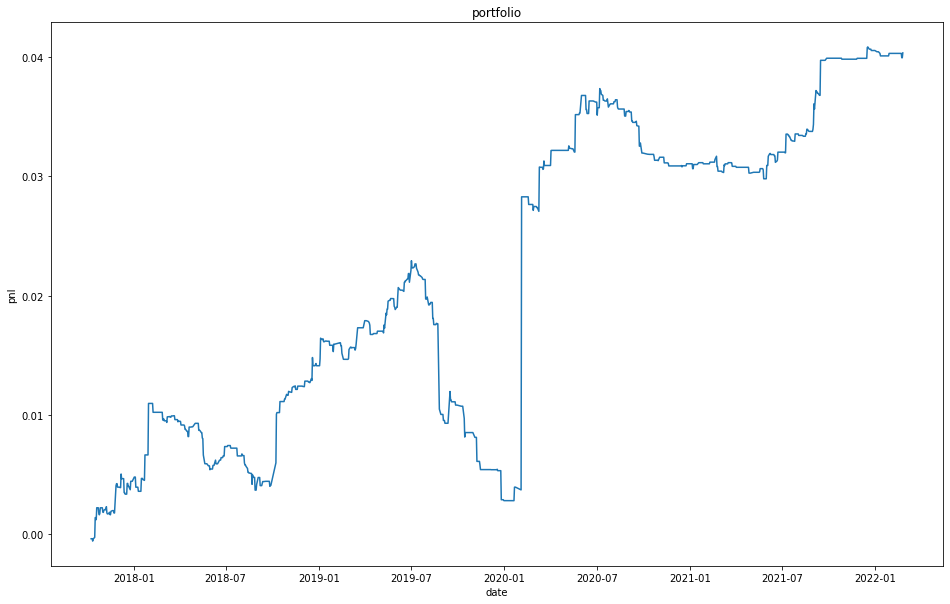

In [61]:
all_portfolio = np.array(np.mean(all_pnl[:,:i], axis=1))
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());

- get training samples

In [68]:
split_date = "201910"

In [69]:
train_sample = np.array(all_dates)<split_date

- now let's see the in-sample and out-of-sample performance


- the previous result used the whole data set 
- so it may be more optimistic than reality
- now we split the data into training sample and test sample


- at first let's remain 2018 as out-of-sample

- number of training samples

In [64]:
sum(train_sample)
## 486

486

In [70]:
test_sample = np.array(all_dates)>split_date
sum(test_sample)
## 580

580

In [66]:
%%time
signal_name = "trade.imb.4096"
train_trade_stat = dict([])
open_list = np.arange(0.06, 0.2, 0.002)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                  atr_filter=0.01)
        result = compute([delayed(f_par)(file) for file in np.array(all_dates)[train_sample]])[0]
    trade_stat = get_hft_summary(result, thre_mat, sum(train_sample))
    train_trade_stat[product] = trade_stat
# Wall time: 10min 9s

Wall time: 10min 9s


In [71]:
save(train_trade_stat, HEAD_PATH+"/energy_train_trade_stat.pkl")

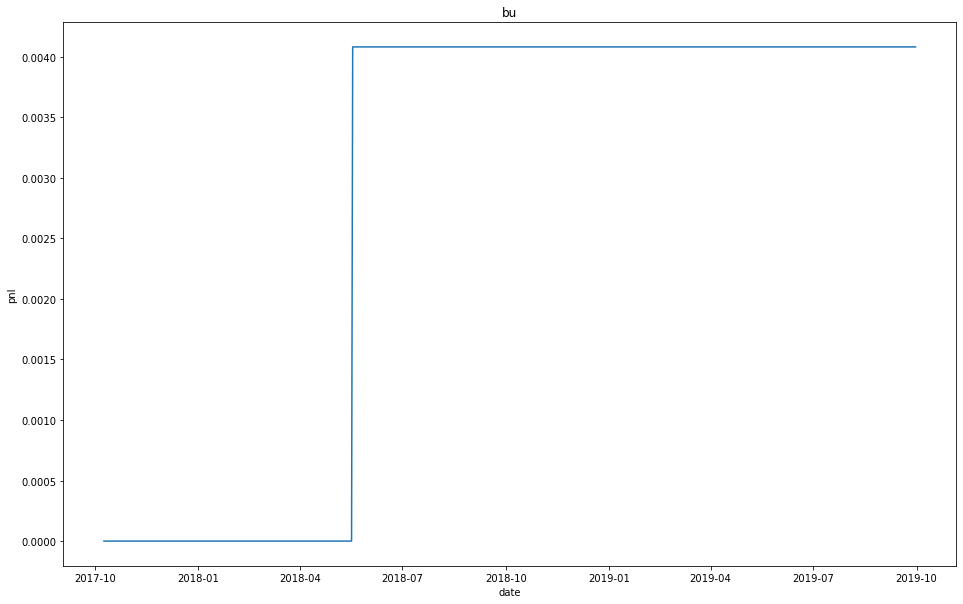

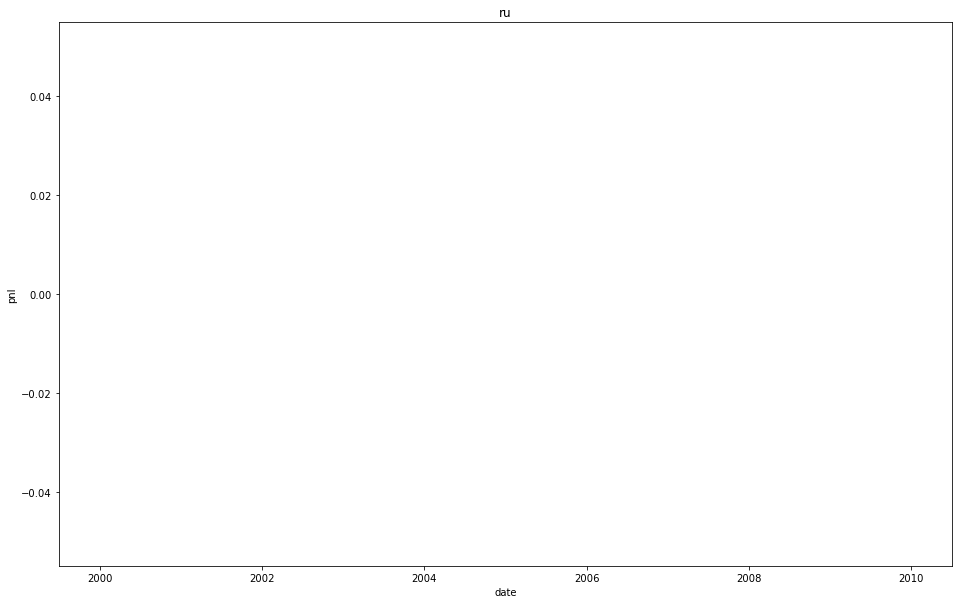

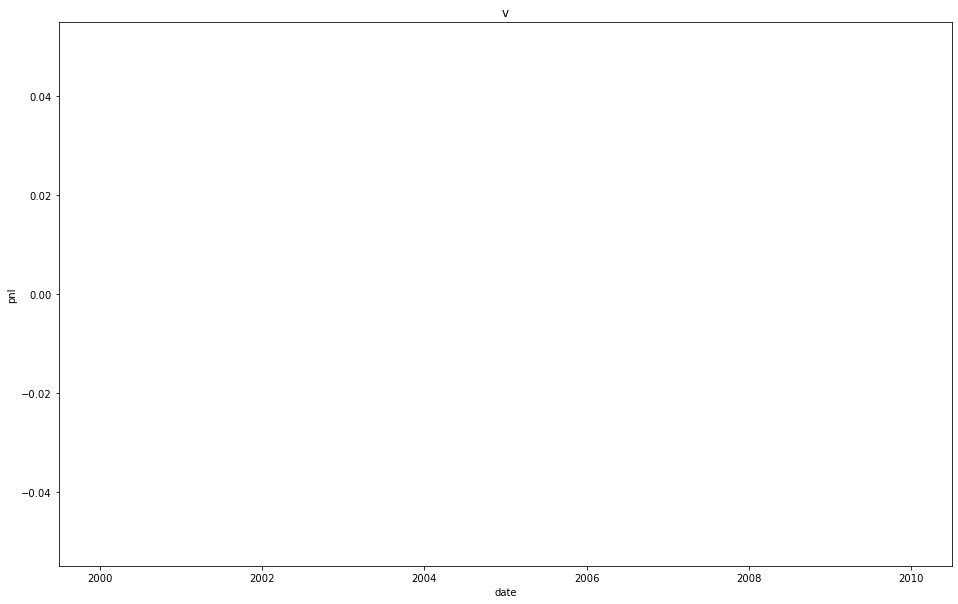

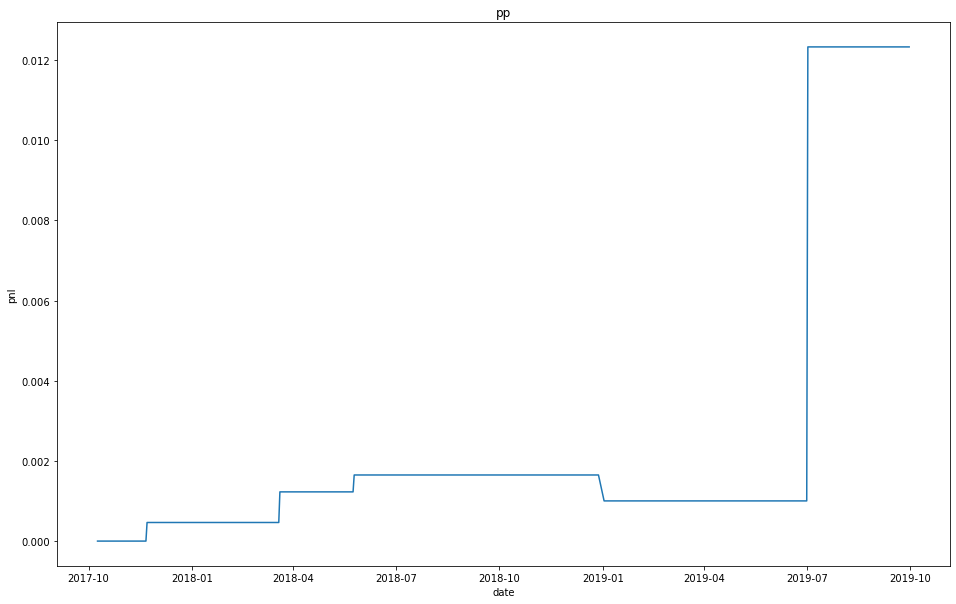

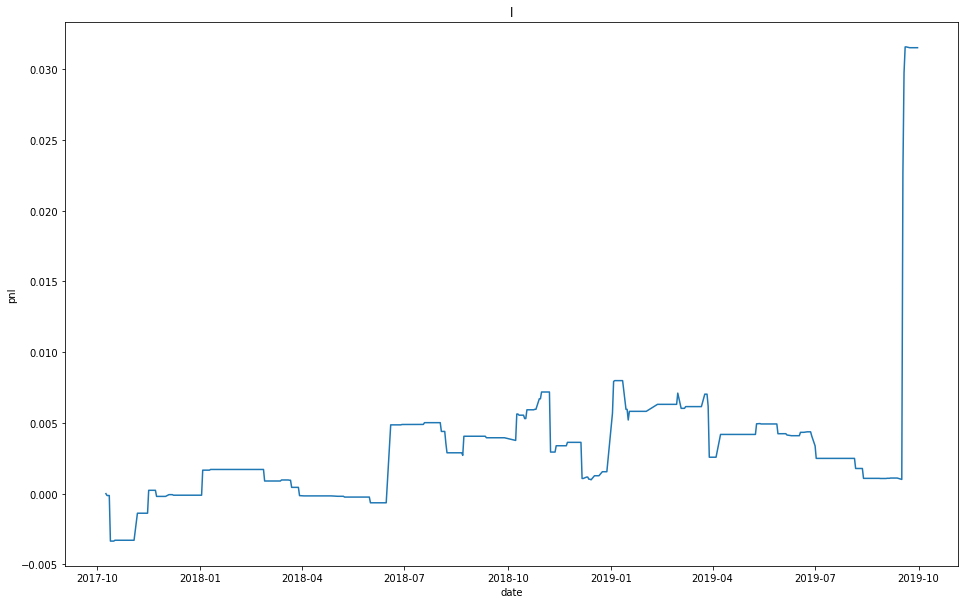

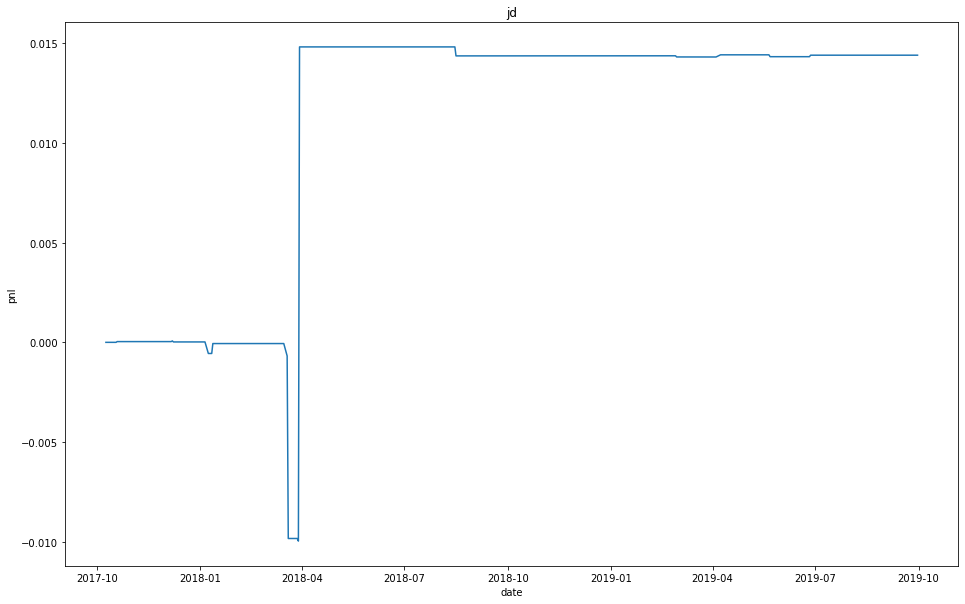

In [72]:
i = 0
train_trade_stat = load(HEAD_PATH+"/energy_train_trade_stat.pkl")
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = train_trade_stat[product]
    good_strat = (trade_stat["final.result"]["avg.pnl"]>1*spread) & (trade_stat["final.result"]["num"]>0)
    good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    i = i+1
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates[train_sample], good_pnl.cumsum());


In [73]:
%%time
signal_name = "trade.imb.4096"
test_trade_stat = dict([])
open_list = np.arange(0.06, 0.2, 0.002)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=0.01)
        result = compute([delayed(f_par)(file) for file in np.array(all_dates)[test_sample]])[0]
    trade_stat = get_hft_summary(result, thre_mat, sum(test_sample))
    test_trade_stat[product] = trade_stat
# Wall time: 18min 3s

Wall time: 18min 3s


In [74]:
save(test_trade_stat, HEAD_PATH+"/energy_test_trade_stat.pkl")

- now we get the out-of-sample test result

bu train sharpe  0.7172191381865562 test sharpe  -0.25135687603326073 10
pp train sharpe  0.7766400703949073 test sharpe  0.5414828896381618 255
l train sharpe  0.8824018695629176 test sharpe  0.7695133224127482 190
jd train sharpe  0.39030540211051074 test sharpe  0.6624372666157424 182


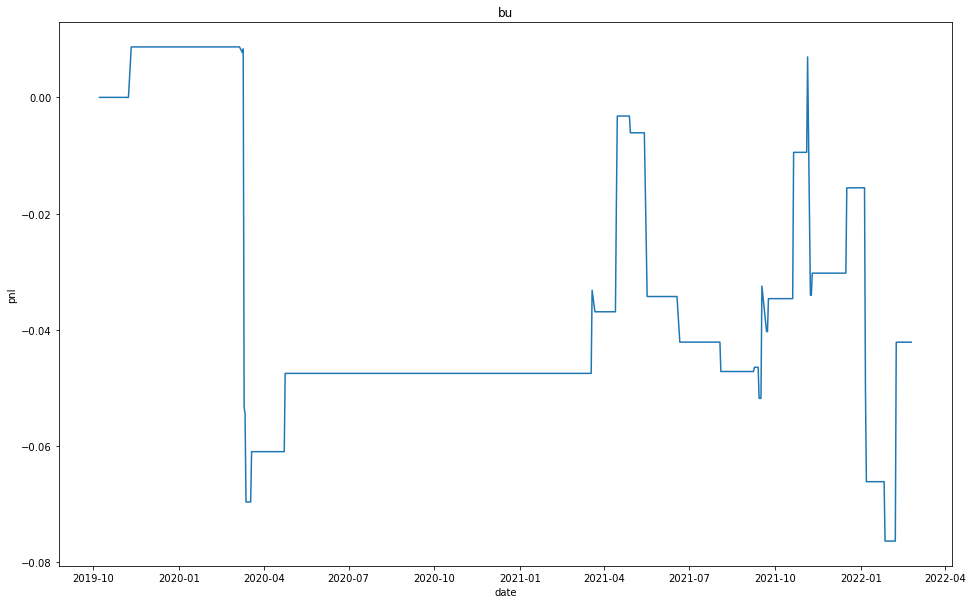

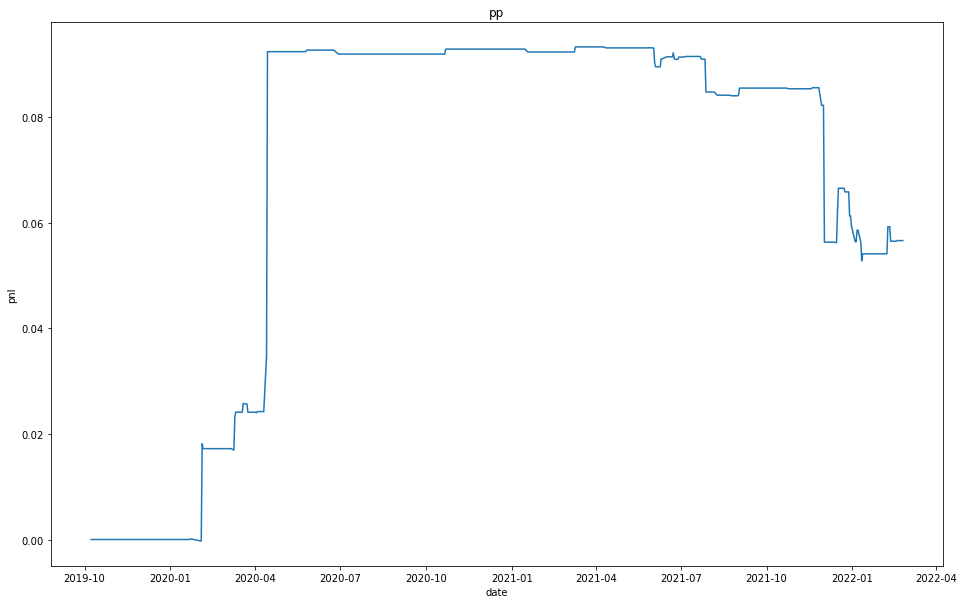

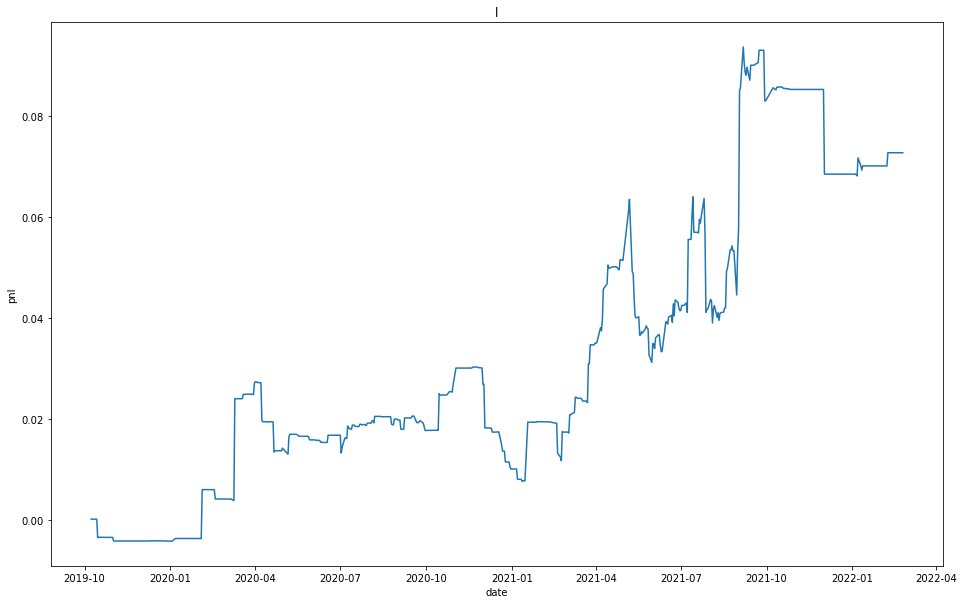

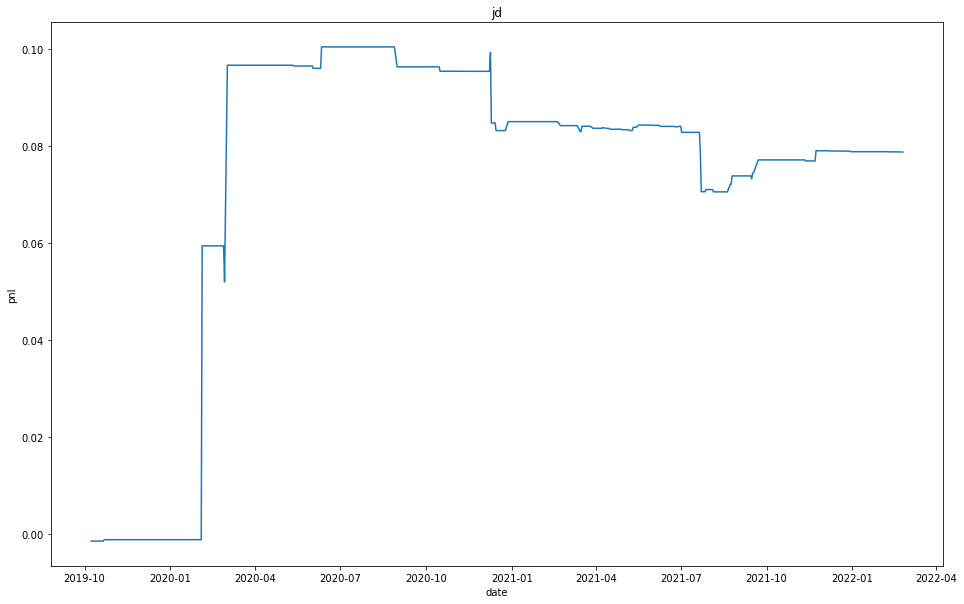

In [75]:
i = 0
train_trade_stat = load(HEAD_PATH+"/energy_train_trade_stat.pkl")
test_trade_stat = load(HEAD_PATH+"/energy_test_trade_stat.pkl")
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = train_trade_stat[product]
    good_strat = (trade_stat["final.result"]["avg.pnl"]>1*spread) & (trade_stat["final.result"]["num"]>0)
    if sum(good_strat)==0:
        continue
    train_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    trade_stat = test_trade_stat[product]
    test_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl), sum(good_strat))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates[test_sample], test_pnl.cumsum());
    
# bu train sharpe  0.7172191381865562 test sharpe  -0.25135687603326073 10
# pp train sharpe  0.7766400703949073 test sharpe  0.5414828896381618 255
# l train sharpe  0.8824018695629176 test sharpe  0.7695133224127482 190
# jd train sharpe  0.39030540211051074 test sharpe  0.6624372666157424 182



- now calculate the result of test samples

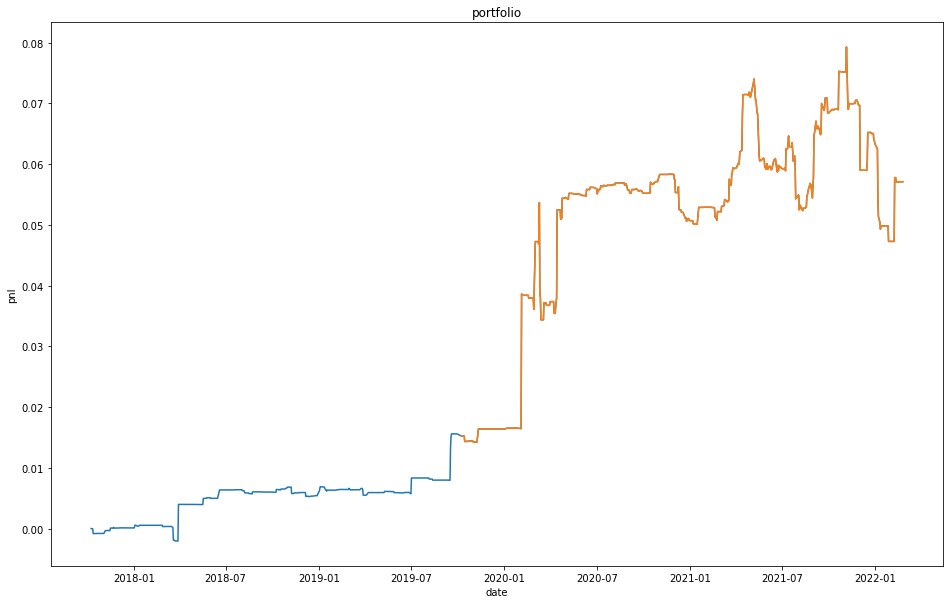

In [76]:
train_portfolio = np.array(np.mean(train_all_pnl[:,:i], axis=1))
test_portfolio = np.array(np.mean(test_all_pnl[:,:i], axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
all_portfolio
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
    

In [77]:
print(sharpe(train_portfolio), sharpe(test_portfolio))
## 1.182615784297853 0.6057123907385986




1.182615784297853 0.6057123907385986


In [78]:
%%time
signal_name = "total.trade.imb.4096"
train_trade_stat = dict([])
open_list = np.arange(0.1, 0.4, 0.02)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                  atr_filter=0.01)
        result = compute([delayed(f_par)(file) for file in np.array(all_dates)[train_sample]])[0]
    trade_stat = get_hft_summary(result, thre_mat, sum(train_sample))
    train_trade_stat[product] = trade_stat
# Wall time: 8min 3s


Wall time: 7min 43s


In [79]:
save(train_trade_stat, HEAD_PATH+"/energy_train_total_trade_stat.pkl")

In [80]:
%%time
signal_name = "total.trade.imb.4096"
test_trade_stat = dict([])
open_list = np.arange(0.1, 0.4, 0.02)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=0.01)
        result = compute([delayed(f_par)(file) for file in np.array(all_dates)[test_sample]])[0]
    trade_stat = get_hft_summary(result, thre_mat, sum(test_sample))
    test_trade_stat[product] = trade_stat
# Wall time: 8min 59s

Wall time: 8min 59s


In [81]:
save(test_trade_stat, HEAD_PATH+"/energy_test_total_trade_stat.pkl")

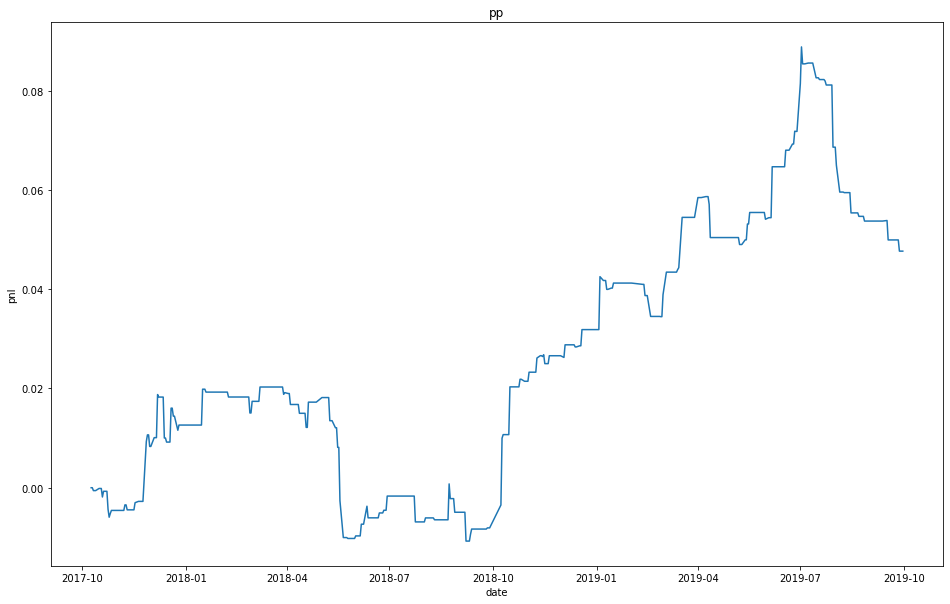

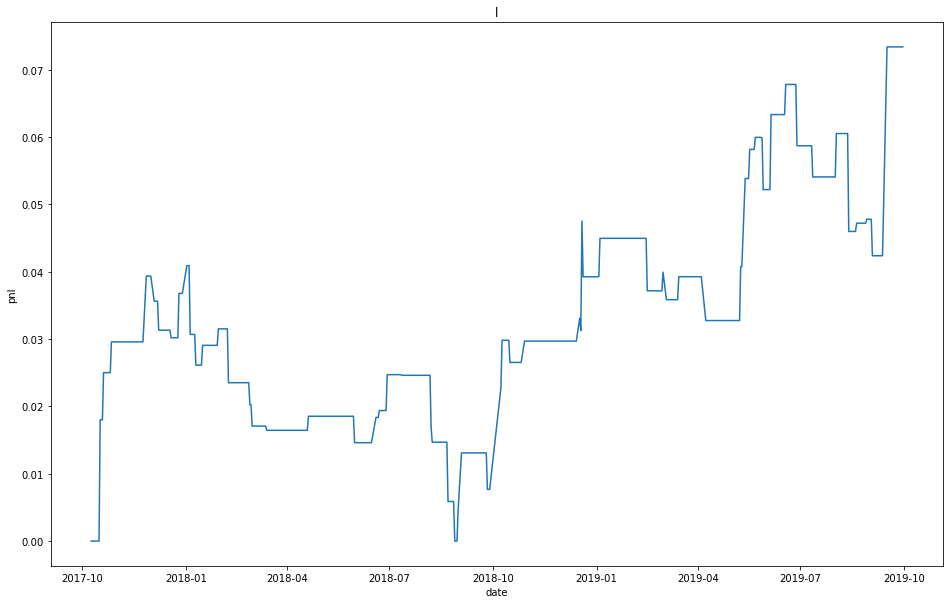

In [82]:
i = 0
train_trade_stat = load(HEAD_PATH+"/energy_train_total_trade_stat.pkl")
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = train_trade_stat[product]
    good_strat = (trade_stat["final.result"]["avg.pnl"]>2*spread) & (trade_stat["final.result"]["num"]>20)
    if sum(good_strat)==0:
        continue
    good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    i = i+1
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates[train_sample], good_pnl.cumsum());

pp train sharpe  0.7429588909271195 test sharpe  0.556869572936992
l train sharpe  0.854157397630625 test sharpe  0.09717586584433967


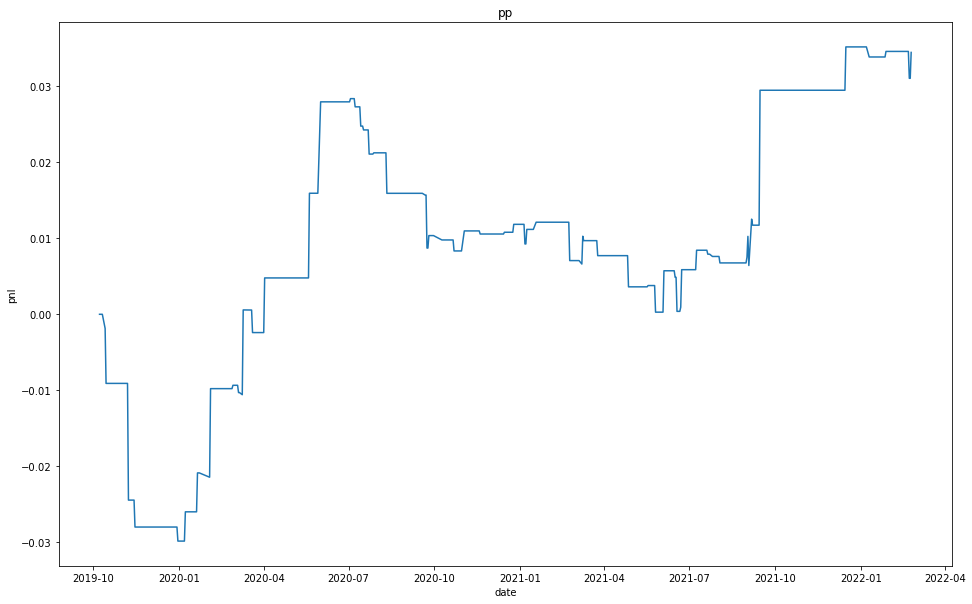

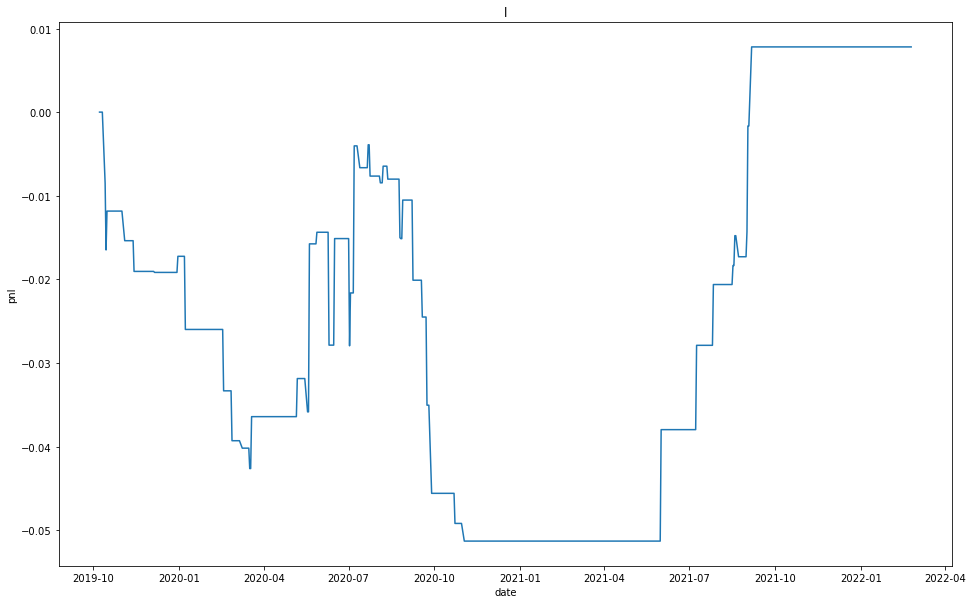

In [83]:
i = 0
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
test_trade_stat = load(HEAD_PATH+"/energy_test_total_trade_stat.pkl")
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = train_trade_stat[product]
    good_strat = (trade_stat["final.result"]["avg.pnl"]>2*spread) & (trade_stat["final.result"]["num"]>20)
    if sum(good_strat)==0:
        continue
    train_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    trade_stat = test_trade_stat[product]
    test_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates[test_sample], test_pnl.cumsum());

    
# pp train sharpe  0.7429588909271195 test sharpe  0.556869572936992
# l train sharpe  0.854157397630625 test sharpe  0.09717586584433967



train sharpe  1.0519243477202869 test sharpe  0.38001759246621075


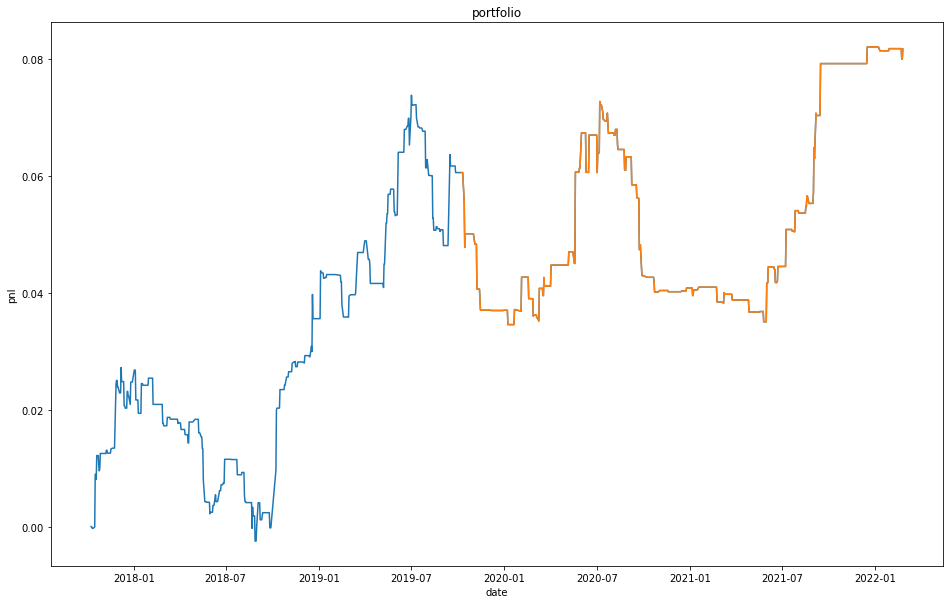

In [84]:
train_portfolio = np.array(np.mean(train_all_pnl[:,:i], axis=1))
test_portfolio = np.array(np.mean(test_all_pnl[:,:i], axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
all_portfolio
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe ", sharpe(train_portfolio), "test sharpe ", sharpe(test_portfolio))

## train sharpe  1.0519243477202869 test sharpe  0.38001759246621075




- Homework:
- you can try using total.trade.imb.4096 to test again
- you can try using 1024/2048 to repeat this process and compare the result
- you can change the atr threshold of 20 to other values
- you can change the split of train/test samples
- you can try using reverse=1 and -1